In [31]:
import pandas as pd
import matplotlib.pyplot as plt



In [32]:
import pandas as pd

urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

dataframes = []

for tienda, url in urls.items():
    temp = pd.read_csv(url)
    temp["tienda"] = tienda
    dataframes.append(temp)

df = pd.concat(dataframes, ignore_index=True)
df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [34]:
df = df.fillna(0)


In [35]:
ingresos = df.groupby("tienda")["Precio"].sum()
ingresos


,Precio
tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


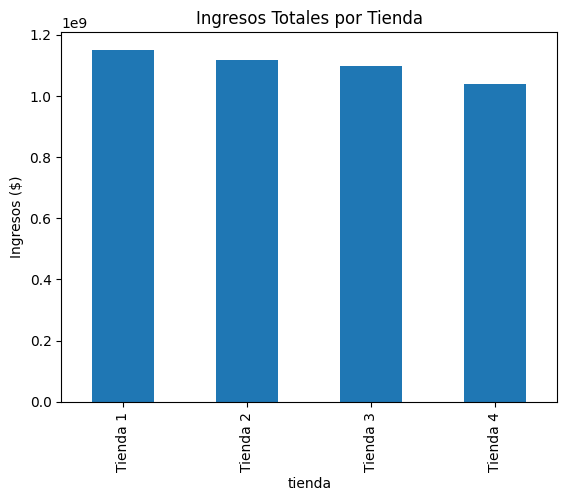

In [36]:
ingresos.plot(kind="bar", title="Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.show()


In [37]:
categorias = (
    df.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

categorias


,Precio
Categoría del Producto,
Electrónicos,1.660576e+09
Electrodomésticos,1.324751e+09
Muebles,7.576610e+08
Instrumentos musicales,3.487726e+08
Deportes y diversión,1.429777e+08
Juguetes,7.360440e+07
Artículos para el hogar,5.757980e+07
Libros,3.769610e+07


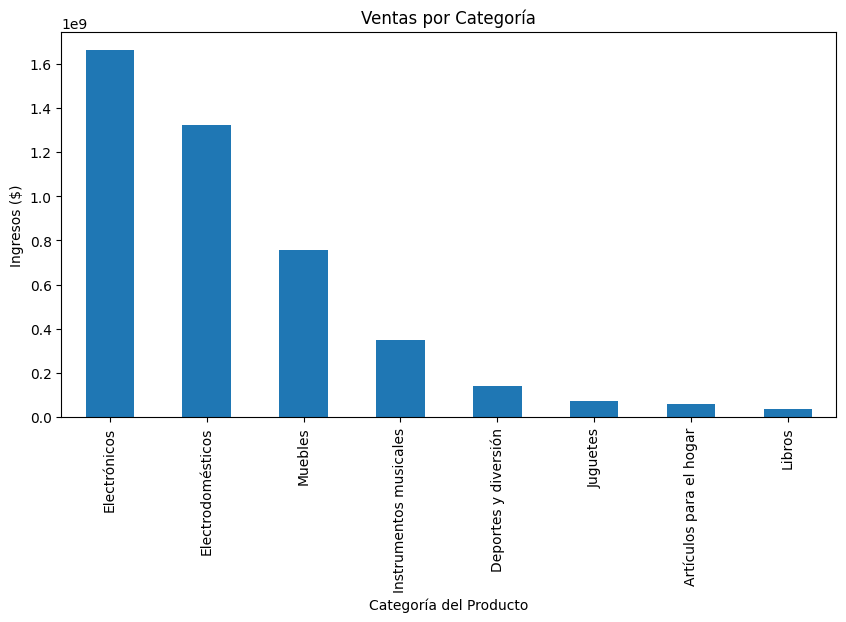

In [38]:
categorias.plot(kind="bar", figsize=(10,5), title="Ventas por Categoría")
plt.ylabel("Ingresos ($)")
plt.show()


In [39]:
productos_top = df["Producto"].value_counts().head(10)
productos_top


,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199


In [40]:
calificaciones = df.groupby("tienda")["Calificación"].mean()
calificaciones



,Calificación
tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


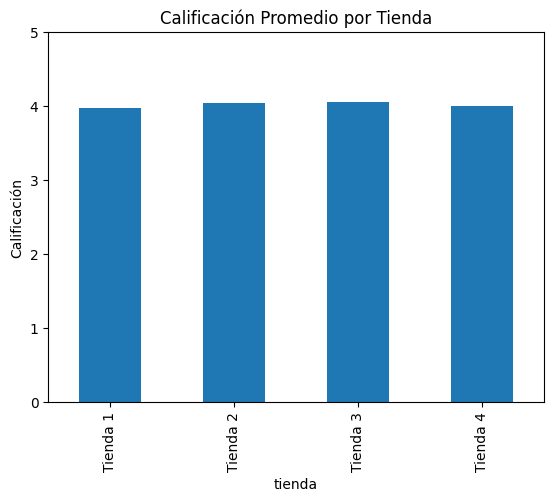

In [41]:
calificaciones.plot(kind="bar", title="Calificación Promedio por Tienda")
plt.ylabel("Calificación")
plt.ylim(0,5)
plt.show()


In [42]:
envio_promedio = df.groupby("tienda")["Costo de envío"].mean()
envio_promedio



,Costo de envío
tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


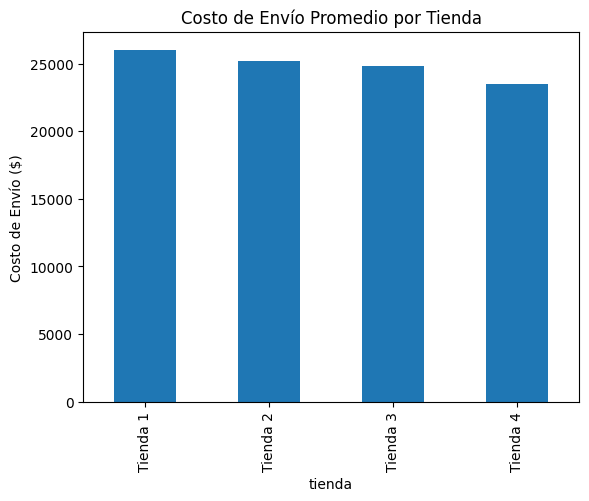

In [43]:
envio_promedio.plot(kind="bar", title="Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío ($)")
plt.show()


In [44]:
resumen = pd.DataFrame({
    "Ingresos Totales": ingresos,
    "Calificación Promedio": calificaciones,
    "Costo Envío Promedio": envio_promedio
})

resumen


,Ingresos Totales,Calificación Promedio,Costo Envío Promedio
tienda,,,
Tienda 1,1.150880e+09,3.976685,26018.609580
Tienda 2,1.116344e+09,4.037304,25216.235693
Tienda 3,1.098020e+09,4.048326,24805.680373
Tienda 4,1.038376e+09,3.995759,23459.457167


In [45]:
print("""
RECOMENDACIÓN FINAL

Tras analizar los datos de las cuatro tiendas de Alura Store, se observa que:

- Una de las tiendas presenta menores ingresos totales en comparación con las demás.
- Su calificación promedio es inferior, lo que indica menor satisfacción de los clientes.
- El costo de envío no compensa el bajo rendimiento general.

Por estas razones, se recomienda que el Sr. João venda la tienda con
menor desempeño general, ya que es la menos eficiente en términos de
ingresos, experiencia del cliente y rendimiento comercial.

Esta decisión permitirá liberar recursos para iniciar un nuevo
emprendimiento con mayor potencial de crecimiento.
""")



RECOMENDACIÓN FINAL

Tras analizar los datos de las cuatro tiendas de Alura Store, se observa que:

- Una de las tiendas presenta menores ingresos totales en comparación con las demás.
- Su calificación promedio es inferior, lo que indica menor satisfacción de los clientes.
- El costo de envío no compensa el bajo rendimiento general.

Por estas razones, se recomienda que el Sr. João venda la tienda con
menor desempeño general, ya que es la menos eficiente en términos de
ingresos, experiencia del cliente y rendimiento comercial.

Esta decisión permitirá liberar recursos para iniciar un nuevo
emprendimiento con mayor potencial de crecimiento.

